In [18]:
import sys
import os.path as o
import numpy as np
import os
import cdd
import cvxpy as cp
import random

import matplotlib.pyplot as plt
from matplotlib import patheffects
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

from mrg32k3a.mrg32k3a import MRG32k3a

from simopt.experiment_base import ProblemSolver, read_experiment_results, post_normalize, plot_progress_curves, plot_solvability_cdfs, plot_area_scatterplots

rng = MRG32k3a()

In [19]:
csa_name = "CSA_LP"
problem_name = "exp"
file_name_path = #your file path
csa_file_path = file_name_path + csa_name + "_on_" + problem_name + ".pickle"

In [20]:
from simopt.models import *
from simopt.solvers import csa_lp

In [21]:
problem_factors = {
    "initial_solution":13*(10,),
    "budget":7000,
    "constraint_nodes":[3,8],
    "max_length_to_node":[60,50]
}

#san_model = stoch_san.stochSAN()
san_problem = stoch_san.SANLongestPathStochastic(fixed_factors = problem_factors)

san_problem.upper_bounds = 13*(10,)
san_problem.lower_bounds = 13*(0.1,)

#here, Ci, di,Ce,de are None, you may define them using
#san_problem.Ci = .....
#Here, lower bounds and upper bounds are added for box constraints

In [22]:
experiments = []
#this is an example, you may change any parameters you want
csa_factors = {'tolerance':0.01} 
name = 'csa_lp'

exp = ProblemSolver(solver_name=csa_name, 
                      solver_rename = name,
                     problem=san_problem,
                     solver_fixed_factors=csa_factors, 
                     file_name_path = csa_file_path)

experiments.append(exp)

In [23]:
for e in experiments:
    #print("************************")
    #print(e.solver.name)
    #print("************************")
    e.run(n_macroreps=1)
    e.post_replicate(n_postreps=10)
    #print("------------------")

post_normalize(experiments, n_postreps_init_opt=10)

['/Users/boomts59/Downloads/simopt-python_dev_joe/experiments/outputs/00Try/plots/SOLVER_SET_on_SAN-2_mean_prog_curve_unnorm.png']

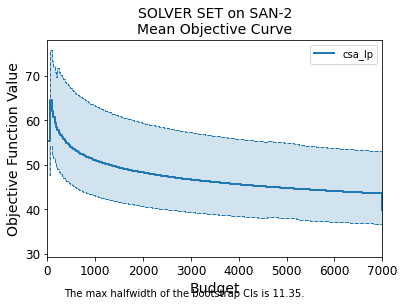

In [24]:
plot_progress_curves(experiments=experiments, plot_type="mean", normalize=False)